<a href="https://colab.research.google.com/github/Jgallear/CSSP_brazil_23_24/blob/main/plot_best_model_performance_vs_SOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install cartopy

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from sklearn.inspection import PartialDependenceDisplay
from shapely.geometry import Point
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
#from rasterio import CRS
from shapely.geometry import mapping
import xarray as xr
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import Ridge
import functools
import pickle
import cartopy.feature as cf
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import tensorflow as tf
import itertools

In [5]:
# load best model here
bestm_res = pd.read_csv('/content/drive/MyDrive/model_outs/GBM_out_df.csv')
print(bestm_res.columns)

Index(['lat', 'lon', 'month', 'year', 'prediction', 'testy'], dtype='object')


In [6]:
# load df with gridded SOI index values
SOI_df = pd.read_csv('/content/drive/MyDrive/enso_m1_df.csv')
print(SOI_df)

        index     lon     lat      vhi-1   precip-1      rzsm-1  spei1-1m  \
0           1 -53.375 -32.125  79.323750  146.58607   98.162980  1.228278   
1           2 -53.375 -32.125  77.111895  184.82845   97.594270  1.472914   
2           3 -53.375 -32.125  64.150561  108.86273   97.605330  1.680747   
3           4 -53.375 -32.125  54.270359  145.90760  100.000000  1.641170   
4           5 -53.375 -32.125  59.200781   66.53850  100.000000 -0.442996   
...       ...     ...     ...        ...        ...         ...       ...   
575185    203 -47.625  -0.875  41.102345  170.38158   66.929490  0.324701   
575186    204 -47.625  -0.875  49.922513  294.35620   80.138200  1.130223   
575187    205 -47.625  -0.875  52.101102  125.48111   88.888840  2.664571   
575188    206 -47.625  -0.875  46.753572   24.13338   77.834076  2.523025   
575189    207 -47.625  -0.875  48.627606   71.58264   69.860950  1.286047   

        spei2-1m  spei3-1m   spi01-1   spi02-1   spi03-1     pev-1  \
0    

In [7]:
# merge dataframes
merged_df = bestm_res.merge(SOI_df, on=['lon','lat','month','year'])
print(merged_df)
print(len(merged_df['year'].unique()))
print(merged_df['year'].unique())

           lat     lon  month  year  prediction      testy  index      vhi-1  \
0      -32.125 -53.375      1  2020   54.599674  62.826713    186  45.681895   
1      -32.125 -53.375      1  2020   54.599674  62.826713    186  45.681895   
2      -32.125 -53.375      1  2020   54.599674  62.826713    186  45.681895   
3      -32.125 -53.375      2  2020   51.297320  56.945423    187  62.826713   
4      -32.125 -53.375      2  2020   51.297320  56.945423    187  62.826713   
...        ...     ...    ...   ...         ...        ...    ...        ...   
360904  -0.875 -47.625      7  2005   50.570271  50.538520     27  50.473696   
360905  -0.875 -47.625      8  2005   48.807146  44.921780     28  50.538520   
360906  -0.875 -47.625      9  2005   43.418818  35.035883     29  44.921780   
360907  -0.875 -47.625     10  2005   40.519306  35.797030     30  35.035883   
360908  -0.875 -47.625     11  2005   40.254397  38.391717     31  35.797030   

          precip-1     rzsm-1  ...  spe

In [8]:
merged_df['abs error'] = merged_df['testy'] - merged_df['prediction']

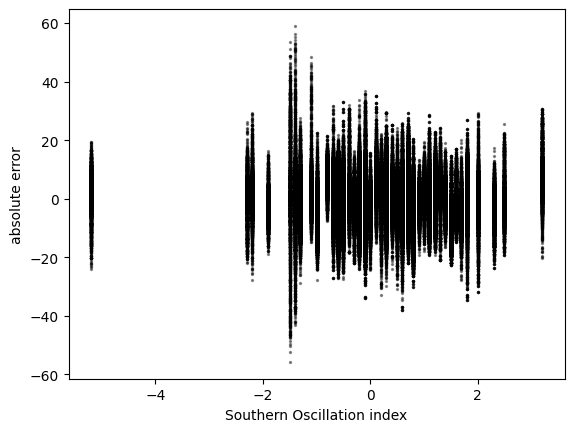

In [9]:
fig = plt.figure()
plt.scatter(merged_df['SOI'],merged_df['abs error'], s=2,alpha=0.4,c='k')
plt.xlabel('Southern Oscillation index')
plt.ylabel('absolute error')
plt.show()

In [10]:
# groupby coordinates then find mean absolute error for each year and month of SOI value
def groupby_yr(df):
  df_list=[]
  for index,df in df.groupby(['year']):
    df_list.append(df)
  return df_list

def groupby_month(df):
  df_list=[]
  for index,df in df.groupby(['month']):
    df_list.append(df)
  return df_list

# Then plot MAE each month against SOI (ie SOI on x axis and mean absolute error on y axis)

In [11]:
merged_df_list = groupby_yr(merged_df)

<ipython-input-10-e84ee2cb64fc>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['year']):


In [12]:
def loop_through_group_metrics(df):
  # produce r2 and mae for each group
  # (in original case data is grouped by either positive or negative SOI)
  mae_list=[]
  r2_list=[]
  group_number=[]
  df_list = groupby_yr(df)
  for i in range(len(df_list)):
    dfi = df_list[i]
    #print(dfi)
    dfi_list = groupby_month(dfi)
    mae_i=[]
    r2_i=[]
    for j in range(len(dfi_list)):
      #print(dfi_list[j])
      break
      mae_ij = mean_absolute_error(dfi_list[j]['testy'],dfi_list[j]['prediction'])
      mae_i.append(mae_ij)
      r2_ij = r2_score(dfi_list[j]['testy'],dfi_list[j]['prediction'])
      r2_i.append(r2_ij)
      group_number.append(dfi_list[i]['SOI'])
    mae_list.append(mae_i)
    r2_list.append(r2_i)
  return r2_list, mae_list, group_number

In [13]:
r2_list, mae_list, SOI_number = loop_through_group_metrics(merged_df)

<ipython-input-10-e84ee2cb64fc>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['year']):
<ipython-input-10-e84ee2cb64fc>:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):
<ipython-input-10-e84ee2cb64fc>:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['month']):
<ipython-input-10-e84ee2cb64fc>:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returne

In [14]:
print(len(SOI_number))
print(len(mae_list))
print(len(mae_list[0]))

0
8
0


In [15]:
# convert SOI into either positive or negative and add as separate column to denote el nino or la nina
def find_SOI_mode(df):
  SOI_mode_list=[]
  SOI_values = df['SOI'].values
  for i in range(len(SOI_values)):
    if SOI_values[i] > 0.0:
      SOI_mode_list.append(1)
    elif SOI_values[i] < 0.0:
      SOI_mode_list.append(-1)
    else:
      #print('error')
      SOI_mode_list.append(np.NAN)
  #print(len(SOI_mode_list))
  return SOI_mode_list

In [16]:
SOI_list = find_SOI_mode(merged_df)

In [17]:
# groupby el nino and la nina and plot bar chart of r2 and mae score based on el nino and la nina


In [18]:
# Plot model skill versus southern oscilliation index values (continuous var)


In [19]:
merged_df['SOI mode'] = SOI_list

In [20]:
print(len(merged_df))
merged_df.dropna(inplace=True)
print(len(merged_df))

360909
357575


In [21]:
# groupby SOI mode
def groupby_SOI_mode(df):
  df_list=[]
  for index,df in df.groupby(['SOI mode']):
    df_list.append(df)
  return df_list

In [22]:
merged_df_list = groupby_SOI_mode(merged_df)

<ipython-input-21-94a438f642bd>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for index,df in df.groupby(['SOI mode']):


In [23]:
print(len(merged_df_list))

2


In [24]:
# produce r2 and Mean absolute error metrics for both El nino and la Nina modes
def loop_through_group_metrics(df_list):
  # produce r2 and mae for each group
  # (in original case data is grouped by either positive or negative SOI)
  mae_list=[]
  r2_list=[]
  group_number=[]
  for i in range(len(df_list)):
    mae_i = mean_absolute_error(df_list[i]['testy'],df_list[i]['prediction'])
    mae_list.append(mae_i)
    r2_i = r2_score(df_list[i]['testy'],df_list[i]['prediction'])
    r2_list.append(r2_i)
    group_number.append(df_list[i]['SOI mode'].values[0])
  return r2_list, mae_list, group_number

In [25]:
r2_scores, mae_scores, mode_nos = loop_through_group_metrics(merged_df_list)

In [26]:
print(mode_nos)
print(r2_scores)
print(mae_scores)

[-1.0, 1.0]
[0.58401823854065, 0.6806127203956498]
[6.32354903455737, 6.265672982172552]


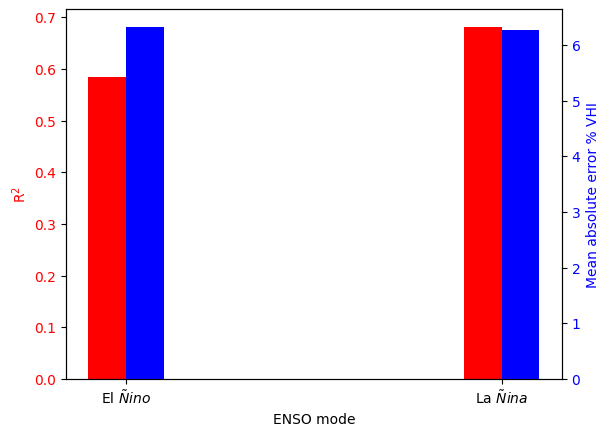

In [27]:
# Plot 1 Figure 2 y axes, r2 and mae for el nino and la nina years
fig, ax1 = plt.subplots()
color='red'
ax1.set_xlabel('ENSO mode')
ax1.set_ylabel(r'R$^2$', color=color)
ax1.bar(np.asarray(mode_nos)-0.1, r2_scores, color=color,width=0.2, label=r'R$^2$ score')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Mean absolute error % VHI', color=color)  # we already handled the x-label with ax1
ax2.bar(np.asarray(mode_nos)+0.1, mae_scores, color=color,width=0.2, label='MAE score')
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks([-1,1],labels=[r'El $\~Nino$', 'La $\~Nina$'])

plt.show()

In [28]:
# plot MAE, R2 spatially for ENSO modes as a comparison (2 maps next to each other)
##
print(merged_df_list)
print(len(merged_df_list))

[           lat     lon  month  year  prediction      testy  index      vhi-1  \
3      -32.125 -53.375      2  2020   51.297320  56.945423    187  62.826713   
4      -32.125 -53.375      2  2020   51.297320  56.945423    187  62.826713   
5      -32.125 -53.375      2  2020   51.297320  56.945423    187  62.826713   
6      -32.125 -53.375      3  2020   42.745911  39.100269    188  56.945423   
7      -32.125 -53.375      3  2020   42.745911  39.100269    188  56.945423   
...        ...     ...    ...   ...         ...        ...    ...        ...   
360899  -0.875 -47.625      2  2005   43.526477  47.708051     22  44.444657   
360901  -0.875 -47.625      4  2005   46.234594  44.197981     24  47.219167   
360902  -0.875 -47.625      5  2005   44.413012  45.429215     25  44.197981   
360905  -0.875 -47.625      8  2005   48.807146  44.921780     28  50.538520   
360908  -0.875 -47.625     11  2005   40.254397  38.391717     31  35.797030   

          precip-1      rzsm-1  ...   

In [29]:
# pickle merged df list
fileObj = open('/content/drive/MyDrive/SOI_df.pkl', 'wb')
pickle.dump(merged_df_list,fileObj)
fileObj.close()

In [30]:
def groupby_grid_cell(df):
  df_list=[]
  for index,df in df.groupby(['lat','lon']):
    df_list.append(df)
  return df_list

In [31]:
# Get 2 sets of r2 and mae by looping through list and obtaining metrics
# Will be a 4 panel Figure (2 r2 2 mae for both El Nino and La Nina)
def grid_cell_metrics_per_SOI_mode(df_list):
  modes_r2=[]
  modes_mae=[]
  modes_lat=[]
  modes_lon=[]
  mean_obs=[]
  mean_preds=[]
  bias=[]
  for i in range(len(df_list)):
    dfi = df_list[i]
    dfi_list = groupby_grid_cell(dfi)
    # for every grid cell
    gc_r2_list=[]
    gc_mae_list=[]
    lat_list=[]
    lon_list=[]
    mean_obs_list=[]
    mean_preds_list=[]
    bias_list=[]
    for c in range(len(dfi_list)):
      dfic = dfi_list[c]
      r2_v = r2_score(dfic['testy'],dfic['prediction'])
      mean_o = np.mean(dfic['testy'])
      mean_p = np.mean(dfic['prediction'])
      # Get under and over-prediction for el nino and la nina
      bia = np.mean(dfic['prediction'].values - dfic['testy'].values)
      bias_list.append(bia)
      mean_obs_list.append(mean_o)
      mean_preds_list.append(mean_p)
      #print(r2_v)
      mae_v = mean_absolute_error(dfic['testy'],dfic['prediction'])
      gc_r2_list.append(r2_v)
      gc_mae_list.append(mae_v)
      # append lat and lon values
      lat_list.append(dfic['lat'].values[0])
      lon_list.append(dfic['lon'].values[0])
    ## append to modes lists
    bias.append(bias_list)
    mean_obs.append(mean_obs_list)
    mean_preds.append(mean_preds_list)
    modes_r2.append(gc_r2_list)
    modes_mae.append(gc_mae_list)
    modes_lat.append(lat_list)
    modes_lon.append(lon_list)
  return modes_r2, modes_mae, modes_lat, modes_lon, mean_obs, mean_preds, bias

In [32]:
#
modes_r2, modes_mae, modes_lat, modes_lon, mean_obs, mean_preds, bias = grid_cell_metrics_per_SOI_mode(merged_df_list)

In [33]:
print(len(modes_mae[0]))
print(len(modes_r2[0]))

print(len(modes_lat))
print(len(modes_lat[0]))
print(modes_mae[0][0])
print(modes_r2[0][0])

2497
2497
2
2497
6.985086760500567
0.4331025969055293


In [34]:
fname = '/content/drive/MyDrive/shapefiles/BR/BR_EST_SAD69.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')

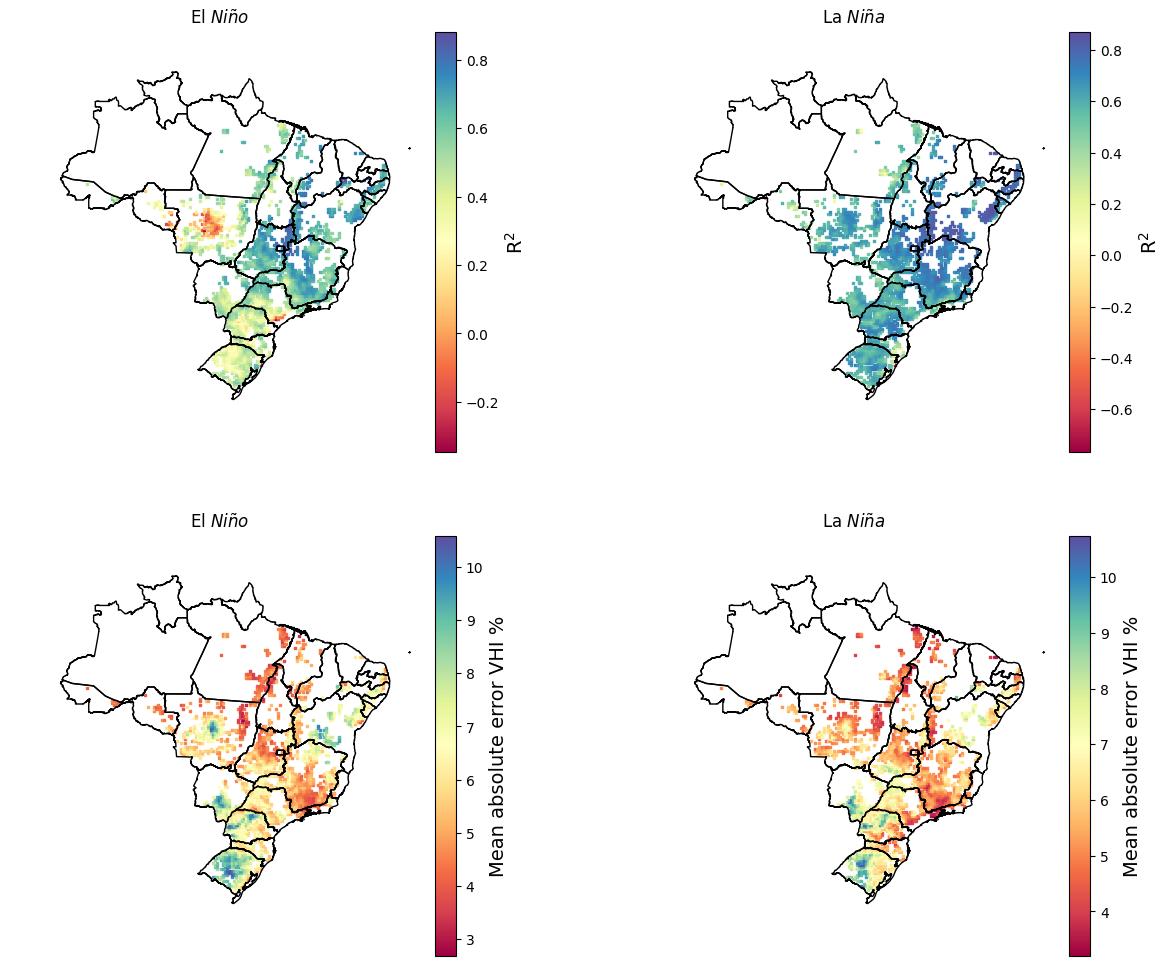

In [35]:
# Now plot
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[0], modes_lat[0], c=modes_r2[0], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'R$^2$',fontsize='14')
ax1.title.set_text(r'El $Ni\~no$')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

ax1 = fig.add_subplot(2,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[1], modes_lat[1], c=modes_r2[1], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'R$^2$',fontsize='14')
ax1.title.set_text(r'La $Ni\~na$')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')


ax1 = fig.add_subplot(2,2,3,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[0], modes_lat[0], c=modes_mae[0], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'Mean absolute error VHI %',fontsize='14')
ax1.title.set_text(r'El $Ni\~no$')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')


ax1 = fig.add_subplot(2,2,4,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[1], modes_lat[1], c=modes_mae[1], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'Mean absolute error VHI %',fontsize='14')
ax1.title.set_text(r'La $Ni\~na$')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')

plt.savefig('/content/drive/MyDrive/Figures/SOI_performance_maps_unboxed.png',dpi=300)
plt.show()

In [36]:
print(len(modes_lon[0]))
print(np.min(modes_lon[0]))
print(np.max(modes_lon[0]))

2497
-70.875
-35.375


In [37]:
xt = np.linspace(np.min(modes_lon[0]),np.max(modes_lon[0]),5)
xt = np.round(xt,decimals=0)

yt = np.linspace(np.min(modes_lat[0]),np.max(modes_lat[0]),5)
yt = np.round(yt,decimals=0)

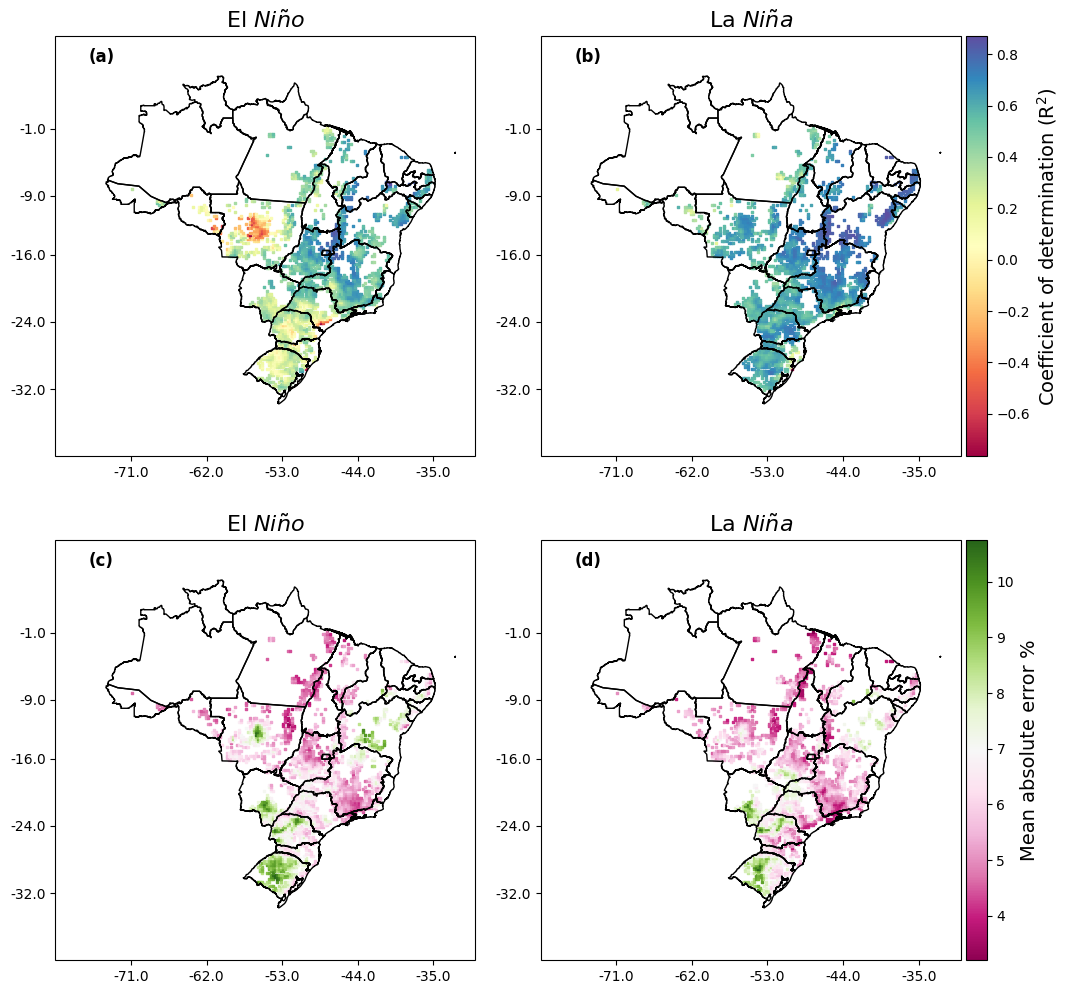

In [38]:
# Now plot
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[0], modes_lat[0], c=modes_r2[0], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel(r'R$^2$',fontsize='14')
ax1.set_title(r'El $Ni\~no$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(a)',weight='bold',fontsize=12)

ax1 = fig.add_subplot(2,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[1], modes_lat[1], c=modes_r2[1], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'Coefficient of determination (R$^2$)',fontsize='14')
ax1.set_title(r'La $Ni\~na$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(b)',weight='bold',fontsize=12)


ax1 = fig.add_subplot(2,2,3,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[0], modes_lat[0], c=modes_mae[0], marker=',', transform=ccrs.PlateCarree(), cmap='PiYG',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel(r'Mean absolute error VHI %',fontsize='14')
ax1.set_title(r'El $Ni\~no$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(c)',weight='bold',fontsize=12)



ax1 = fig.add_subplot(2,2,4,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[1], modes_lat[1], c=modes_mae[1], marker=',', transform=ccrs.PlateCarree(), cmap='PiYG',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'Mean absolute error %',fontsize='14')
ax1.set_title(r'La $Ni\~na$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(d)',weight='bold',fontsize=12)

plt.subplots_adjust(wspace=-0.25, hspace=0.20)

plt.savefig('/content/drive/MyDrive/Figures/SOI_performance_maps_boxed.png',dpi=300)
plt.show()

In [39]:
# Boxplots of el nino and la nina

In [40]:
print(np.min(mean_obs))
print(np.max(mean_obs))
###
print(np.min(mean_preds))
print(np.max(mean_preds))

32.00749916656319
58.713034984689855
35.18773838619021
56.76341865727669


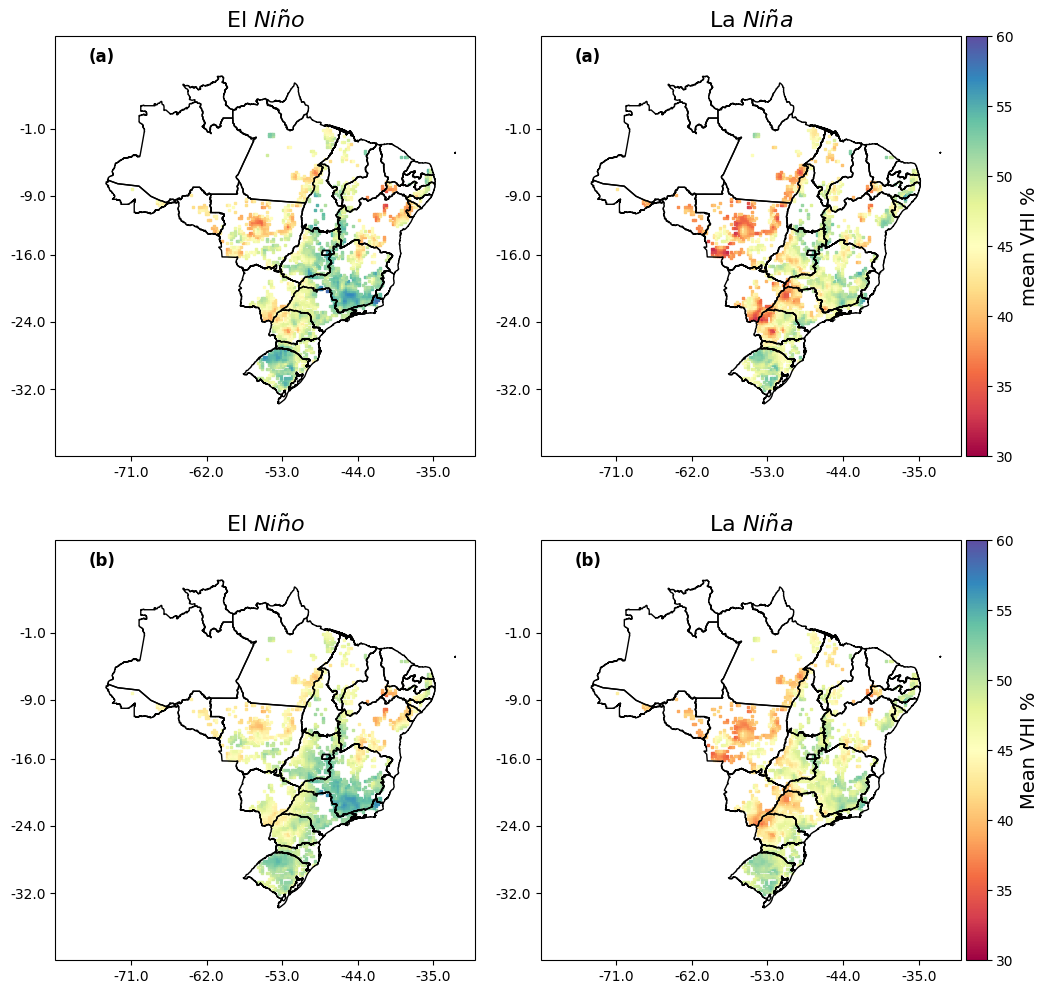

In [41]:
# plot map of under and over prediction for el nino and la nina
# Need average VHI for EL Nino mode and average VHI for la Nina mode both predicted and observed
# Now plot
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[0], modes_lat[0], c=mean_obs[0], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2,vmin=30,vmax=60)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel(r'R$^2$',fontsize='14')
ax1.set_title(r'El $Ni\~no$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(a)',weight='bold',fontsize=12)

ax1 = fig.add_subplot(2,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[1], modes_lat[1], c=mean_obs[1], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2,vmin=30,vmax=60)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'mean VHI %',fontsize='14')
ax1.set_title(r'La $Ni\~na$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(a)',weight='bold',fontsize=12)


ax1 = fig.add_subplot(2,2,3,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[0], modes_lat[0], c=mean_preds[0], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2,vmin=30,vmax=60)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel(r'Mean absolute error VHI %',fontsize='14')
ax1.set_title(r'El $Ni\~no$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(b)',weight='bold',fontsize=12)



ax1 = fig.add_subplot(2,2,4,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[1], modes_lat[1], c=mean_preds[1], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2,vmin=30,vmax=60)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel(r'Mean VHI %',fontsize='14')
ax1.set_title(r'La $Ni\~na$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(b)',weight='bold',fontsize=12)

plt.subplots_adjust(wspace=-0.25, hspace=0.20)

plt.savefig('/content/drive/MyDrive/Figures/obs_pred_vhi_maps',dpi=300)
plt.show()

<ipython-input-42-a7cb977d007d>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


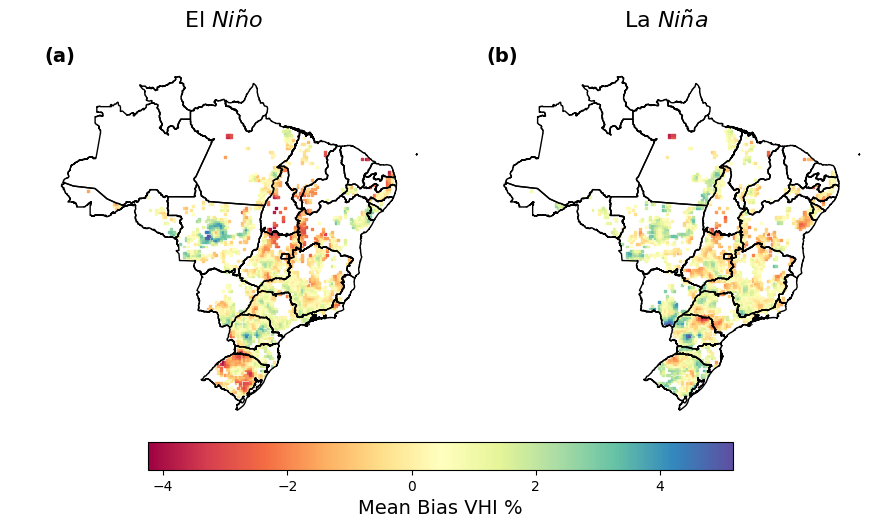

In [42]:
fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[0], modes_lat[0], c=bias[0], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel(r'R$^2$',fontsize='14')
ax1.set_title(r'El $Ni\~no$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')
#ax1.set_xticks(xt)
#ax1.set_xticklabels(ax1.get_xticks())
#ax1.set_yticks(yt)
#ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(a)',weight='bold',fontsize=14)

ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.scatter(modes_lon[1], modes_lat[1], c=bias[1], marker=',', transform=ccrs.PlateCarree(), cmap='Spectral',s=2)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel(r'mean VHI bias',fontsize='14')
ax1.set_title(r'La $Ni\~na$',fontsize=16)
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.axis('off')
#ax1.set_xticks(xt)
#ax1.set_xticklabels(ax1.get_xticks())
#ax1.set_yticks(yt)
#ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)-5,np.max(yt)+8,s='(b)',weight='bold',fontsize=14)

cbar_ax = fig.add_axes([0.17, 0.30, 0.65, 0.025])
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel('Mean Bias VHI %',fontsize='14')
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Figures/vhi_bias_maps.png',dpi=300)
plt.show()
